In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

In [2]:
df = pd.read_csv("data.csv", names = ['x1', 'x2'])

In [3]:
df.head()

,x1,x2
0,-0.593257,0.326039
1,-0.050397,1.095127
2,1.685130,-0.074212
3,0.331759,0.814348
4,1.918354,0.024507


# Looking at the data

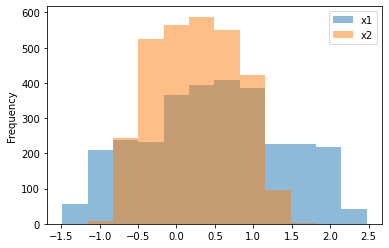

In [4]:
ax = df.plot.hist(bins=12, alpha=0.5)

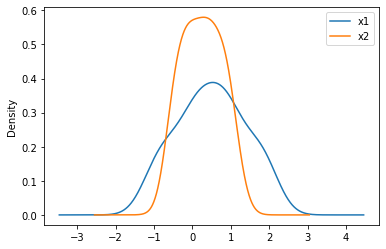

In [5]:
ax = df.plot.kde(bw_method=0.4)

In [6]:
df.x1.max()

2.475282821703754

In [7]:
df.x1.min()

-1.4847465523947567

In [8]:
df.x1.max() - df.x1.min()

3.960029374098511

In [9]:
df.x2.max()

1.64407767054171

In [10]:
df.x2.min()

-1.1512454110697896

In [11]:
df.x2.max() - df.x2.min()

2.7953230816114996

In [12]:
df.isnull().any().any()

False

# Plot

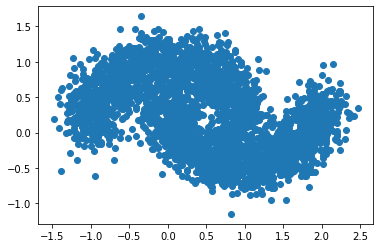

In [13]:
# plt.figure(figsize = (10,10))
plt.scatter(x = df.x1, y = df.x2)
plt.show()

# Nearest Neighbours

In [14]:
from sklearn.neighbors import NearestNeighbors

neighbours = NearestNeighbors(n_neighbors=2) 
nbrs=neighbours.fit(df) 

distances,indices=nbrs.kneighbors(df) 

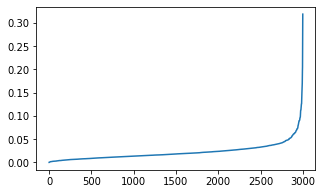

In [15]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

# Kmeans

In [16]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 2)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
print(label)

[0 0 1 ... 1 0 0]


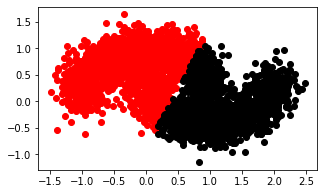

In [17]:
#filter rows of original data
filtered_label0 = df[label == 0]
 
filtered_label1 = df[label == 1]
 
#Plotting the results
plt.scatter(filtered_label0.iloc[:,0] , filtered_label0.iloc[:,1] , color = 'red')
plt.scatter(filtered_label1.iloc[:,0] , filtered_label1.iloc[:,1] , color = 'black')
plt.show()

# Gaussian MIxture Model

In [18]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)
gmm.fit(df)

GaussianMixture(n_components=2)

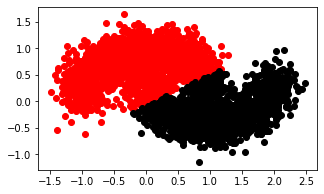

In [19]:
labels = gmm.predict(df)

#filter rows of original data
filtered_label0 = df[labels == 0]
 
filtered_label1 = df[labels == 1]
 
#Plotting the results
plt.scatter(filtered_label0.iloc[:,0] , filtered_label0.iloc[:,1] , color = 'red')
plt.scatter(filtered_label1.iloc[:,0] , filtered_label1.iloc[:,1] , color = 'black')
plt.show()

# Spectral Clustering

In [20]:
from sklearn.cluster import SpectralClustering
sc =  SpectralClustering(n_components=2)

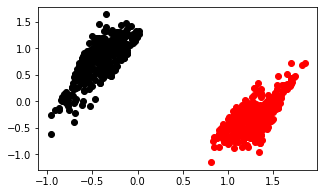

In [21]:
labels = sc.fit_predict(df)

#filter rows of original data
filtered_label0 = df[labels == 0]
 
filtered_label1 = df[labels == 1]
 
#Plotting the results
plt.scatter(filtered_label0.iloc[:,0] , filtered_label0.iloc[:,1] , color = 'red')
plt.scatter(filtered_label1.iloc[:,0] , filtered_label1.iloc[:,1] , color = 'black')
plt.show()

# Birch

In [22]:
from sklearn.cluster import Birch
model = Birch(branching_factor = 50, n_clusters = 2, threshold = 0.4)


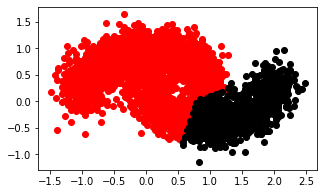

In [23]:
labels = model.fit_predict(df)

#filter rows of original data
filtered_label0 = df[labels == 0]
 
filtered_label1 = df[labels == 1]
 
#Plotting the results
plt.scatter(filtered_label0.iloc[:,0] , filtered_label0.iloc[:,1] , color = 'red')
plt.scatter(filtered_label1.iloc[:,0] , filtered_label1.iloc[:,1] , color = 'black')
plt.show()

# DBSCAN

In [24]:
# cluster the data into five clusters
dbscan = DBSCAN(eps = 0.04, min_samples = 4).fit(df) # fitting the model
labels = dbscan.labels_

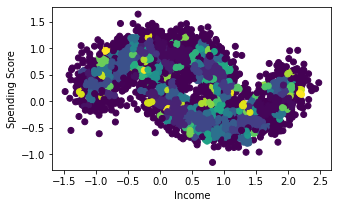

In [25]:
# Plot the clusters
plt.scatter(df.x1, df.x2, c = labels) # plotting the clusters
plt.xlabel("Income") # X-axis label
plt.ylabel("Spending Score") # Y-axis label
plt.show() # showing the plot

# Agglomerative

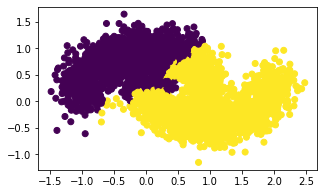

In [34]:
from sklearn.cluster import AgglomerativeClustering
cluster_avg = AgglomerativeClustering(n_clusters=2, affinity='l1', linkage='average')  
cluster_avg.fit_predict(df)
# plt.figure(figsize=(10, 7))  
plt.scatter(df['x1'], df['x2'], c=cluster_avg.labels_)

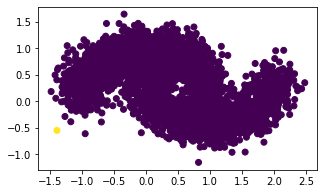

In [35]:
from sklearn.cluster import AgglomerativeClustering
cluster_sngl = AgglomerativeClustering(n_clusters=2, affinity='l1', linkage='single')  
cluster_sngl.fit_predict(df)
# plt.figure(figsize=(10, 7))  
plt.scatter(df['x1'], df['x2'], c=cluster_sngl.labels_)

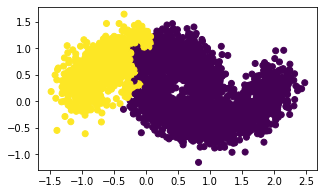

In [36]:
from sklearn.cluster import AgglomerativeClustering
cluster_cmplt = AgglomerativeClustering(n_clusters=2, affinity='l1', linkage='complete')  
cluster_cmplt.fit_predict(df)
# plt.figure(figsize=(10, 7))  
plt.scatter(df['x1'], df['x2'], c=cluster_cmplt.labels_)

Best performance by Agglomerative clustering using average linkage, in my opinion.

In [38]:
pd.DataFrame(cluster_avg.labels_).to_csv("Abhinav_Sethi_test_data_class_labels.csv", index = False, header = False)

In [39]:
cluster_avg.labels_

array([0, 0, 1, ..., 1, 0, 0])

In [43]:
cluster_avg.labels_.shape

(3000,)

# end